# Unsupervised learning

## Кластеризация

Задача кластеризации - разбить пространство объёктов на группы таким образом, чтобы одинаковые объекты были в одной группе, а разные объекты в разных группах

In [2]:
import logging
import os
import shutil 

import numpy as np
from google.colab import drive

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # гарантируем воспроизводимость

logging.basicConfig(format='%(asctime)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)
logger.info('Инициализировали логгер')

ROOT_DIR = '/content/drive' 
drive.mount(ROOT_DIR)
logger.info('Подключили диск')

root_data_dir = os.path.join(ROOT_DIR, 'MyDrive', 'hse_nlp_2021')
if not os.path.exists(root_data_dir):
  raise RuntimeError('Отсутствует директория с данными')
else:
  logger.info('Содержимое директории %s: %s', root_data_dir, os.listdir(root_data_dir))

2022-04-06 06:56:16,655 : Инициализировали логгер
2022-04-06 06:56:39,718 : Подключили диск


Mounted at /content/drive


2022-04-06 06:56:39,968 : Содержимое директории /content/drive/MyDrive/hse_nlp_2021: ['events.csv', 'corpora', 'nltk_data_old', 'nltk_data', '1000k_memes_ocr.tar.gz', 'logs', 'sklearn_data', 'nyt-ingredients-snapshot-2015.csv', 'insurance.csv', 'non_linear.csv', 'clustering.pkl', 'client_segmentation.csv', 'my_little_recsys', 'optimal_push_time', 'boosting_toy_dataset.csv', 'memes', 'torch_models', 'ocr_dataset.zip', 'final_dataset.zip', 'politic_meme.jpg']


Как работает кластеризация

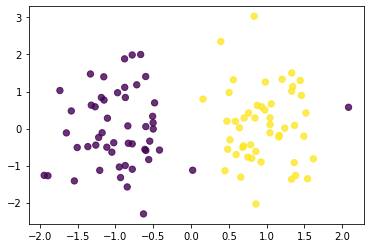

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file_path = os.path.join(root_data_dir, 'clustering.pkl')

# читаем исходный файл
with open(file_path, 'rb') as f:
    data_clustering = pickle.load(f)

#  распаковываем данные
X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

# визуализация
plt.scatter(
    X[:, 0],
    X[:, 1], 
    s=40, c=Y, marker='o', alpha=0.8, label='data'
)
plt.show()

Видно, что данные разделены на два кластера. Кластера линейно не разделимы - мы видим один "выброс" (аутлаер)

Заппускаем алгоритм кластеризации

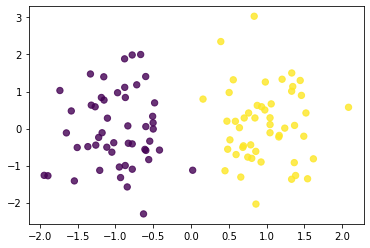

In [4]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X)

predicted_labels = kmeans_model.labels_
# визуализация
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=40, c=predicted_labels, marker='o', alpha=0.8, label='data'
)
plt.show()

Видим, что аутлаер не "выявился", ну это скорее хорошо чем плохо

Каждый кластер характеризуется его центром. Центр кластера - среднее арифметическое  координат точек, которые входят в кластер

In [5]:
FIRST_CLUSTER_LABEL = 0
SECOND_CLUSTER_LABEL = 1

# Первый кластер
c_1 = X[
  np.where(predicted_labels==FIRST_CLUSTER_LABEL)
].mean(axis=0)

# Второй кластер
c_2 = X[
  np.where(predicted_labels==SECOND_CLUSTER_LABEL)
].mean(axis=0)

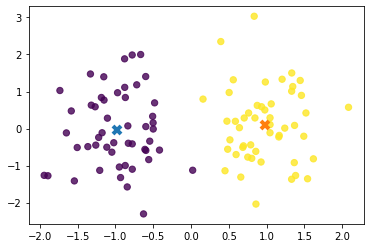

In [6]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=predicted_labels, marker='o', alpha=0.8, label='data')
plt.plot(c_1[0], c_1[1], marker='x', mew=4, ms=8)
plt.plot(c_2[0], c_2[1], marker='x', mew=4, ms=8)
plt.show()

In [7]:
c_1

array([-0.97742455, -0.03263543])

**Задача**

Пусть центр

* Оставьте в датасете `X` только точки, которые соответствуют кластеру `Y==0` (c помощью `np.where`)
* посчитать сумму расстояний от каждой точки полученного датасета до центроида лейбла `c1 = [-0.97742455, -0.03263543]`
* округлите результат

Воспользуемся `from sklearn.metrics.pairwise.euclidean_distances`

Огруглите результат `res` с помощью
```
np.round(res, 2)
```

Мы посчитаем т.н. сумму внутрикластерных расстояний - эта величина часто используется в метриках кластеризации

In [8]:
from sklearn.metrics.pairwise import euclidean_distances

#------ ВАШ КОД ТУТ ----------





#-------------------------------

50.75

## Снижение размерности

### Алгоритм PCA

Загрузим модельные данные

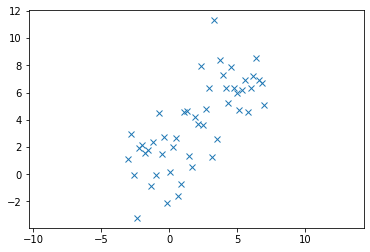

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

file_path = os.path.join(root_data_dir, 'eigen.pkl')

with open(file_path, 'rb') as f:
    X = pickle.load(f)

plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()

Применяем алгоритм `sklearn.decomposition.PCA` к набору данных:

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[5.28331909],
       [3.84284422],
       [5.88859559],
       [8.07409089],
       [4.16799935],
       [3.8592636 ],
       [4.17040423],
       [3.86884344],
       [5.65483844],
       [3.16278418]])

Мы сжали с помощью PCA двумерные данные в одномерный массив. 

![pca_arrays](img/pca_arrays.png)

Давайте визуализируем этот массив - для этого надо произвести обратное преобразование из одномерного массива в двумерный. Отобразим "восстановленные" данные на графике (вторая картинка - исходный, не сжатый массив):

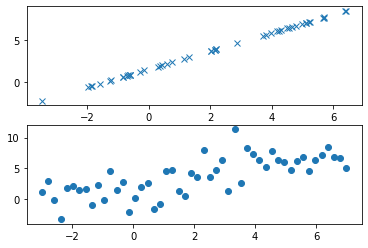

In [12]:
X_new = pca.inverse_transform(X_pca)

plt.figure(1)
plt.subplot(211)
plt.plot(X_new[:,0], X_new[:,1], 'x')

plt.subplot(212)
plt.plot(X[:,0], X[:,1], 'o')
plt.show()

Функция `inverse_transform` перереводит из одномерного пространства обратно в двумерное

Видно, что мы потеряли часть информации (меньше дисперсия - меньше информации в данных)

Алгоритм PCA выявил, что переменная от $x_2$ линейным образом зависит от переменной $x_1$ - то есть вместо перемнной $x_2$ можно использовать линейное преобразование $x_2 = x_1w_1 + w_0$ (эта переменная на первом графике). "Сжатые данные" представляют собой график линейной функции $x_2 = ax_1 + b$. 

Данные, представляли собой облако точек, но алгорим PCA ужал их до одномерного случая. Другие интересные визуализации можно [глянуть по ссылке](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

### Применение к реальным задачам

Снижение размерности применяем, чтобы "облегчить жизнь" алгоритмам машинного обучения. Иногда на данных большой размерности сложно хороший результат получить, а после снижения размерности качество модели улучшается

Применим PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff'

Этот датасет уже разбирали на лекции по классификации

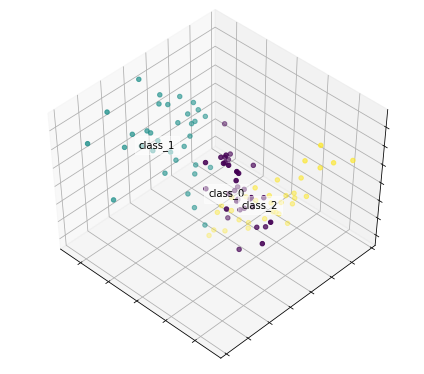

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

file_path = os.path.join(root_data_dir, 'client_segmentation.csv')

df_source = pd.read_csv(file_path)

X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

Сжимаем данные и визуализируем

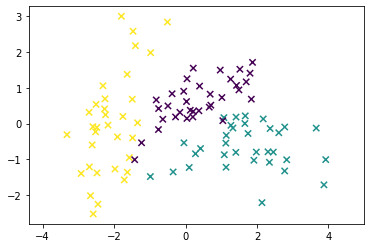

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], s=40, c=y, marker='x')
plt.axis('equal')
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=input_y, random_state=RANDOM_SEED
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)


Вычисляем скор по исходным данным

In [23]:
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

eval_model(X, y)

Accuracy: 0.80000


Применяем преобразование и снова решаем задачку классификации

In [24]:
eval_model(X_pca, y)

Accuracy: 0.83333


**Вывод**: удалось улучшить качество на "слабой" модели решающего дерева за счёт снижения размерности входных данных 

### Алгоритм umap

Ниболее мощный алгоритм для снижения размерности

In [27]:
#  !pip install umap-learn

from umap import UMAP

In [35]:
manifold = UMAP(random_state=RANDOM_SEED, n_complonents=2).fit(X, y)
X_umap = manifold.transform(X)

Визуализируем данные

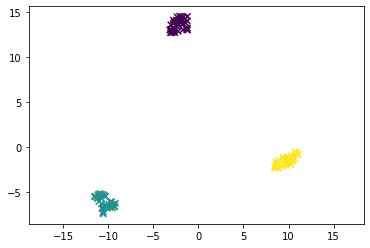

In [34]:
plt.scatter(X_umap[:,0], X_umap[:,1], s=40, c=y, marker='x')
plt.axis('equal')
plt.show()

In [36]:
eval_model(X_umap, y)

Accuracy: 1.00000


Данные стали линейно разделимы, качество потрясающее даже на слабом алгоритме. Подробнее можно почитать в [статье](https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17)

### Снижаем размерность изображений

До сих пор мы работали с табличными данными, для разнообразия можно немного поработать с изображениями (похожий трюк можно увидеть в этой [статье на хабре](https://habr.com/ru/post/275273/)). Для этого нужно установить модуль Pillow (если у вас Анаконда, то https://anaconda.org/anaconda/pillow)

```shell
pip install Pillow
```

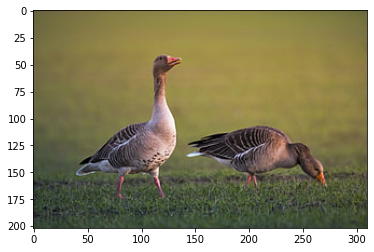

In [38]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg

file_path = os.path.join(root_data_dir, 'gray_goose.jpg')
img = mpimg.imread(file_path)

imshow(img)
plt.show()

У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb. Цветную картинку можно преобразовать в двумерную серую (grayscale) однотонную с помощью формулы, которую я нашёл [тут](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python) 

Однотонная картинка - это по сути матрица, где на пересечении строки и столбца находится яркость пикселя

<class 'numpy.ndarray'> (202, 310)


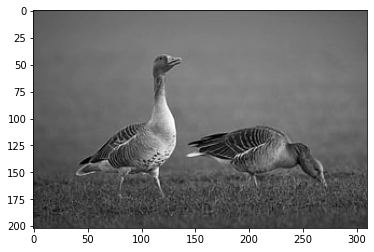

In [40]:
def rgb2gray(rgb):
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)

# демонстрируем, что у нас матрица размерности 202 x 310
print(type(img_gray), img_gray.shape)

imshow(img_gray, cmap = "gray")
plt.show()

Далее 

* обучите на массиве *img_gray* размерности $202 \times 310$ класс TruncatedSVD c параметром n_components=5
* получите матрицу *img_gray_svd* с помощью функции `transform`
* получите массив *img_gray_svd_restored* с помощью функции `inverse_transform`
* визуализируйте массив *img_gray_svd_restored* с помощью функции *imshow*

Этот алгоритм демонстрирует, как происходит сжатие данных большой размерности. А результате у вас должен получиться гусь как бы в очень нечётком виде


In [42]:
from sklearn.decomposition import TruncatedSVD